In [1]:
import numpy as np

import matplotlib # To plot images
import matplotlib.pyplot as plt # Plotting

font = {'family' : 'serif',
         'size'   : 10
       }
matplotlib.rc('font', **font)

from PIL import Image, ImageChops


from gvxrPython3 import gvxr # Simulate X-ray images
from gvxrPython3.utils import plotScreenshot # Visualise the 3D environment if Matplotlib is supported

In [2]:
print("Create an OpenGL context")

window_id = 0
opengl_major_version = 4
opengl_minor_version = 5

# gvxr.createOpenGLContext(window_id, opengl_major_version, opengl_minor_version);

# backend = "OPENGL"
# visible = True

# gvxr.createWindow(window_id, visible, backend, opengl_major_version, opengl_minor_version);

visible = True
# gvxr.createWindow(window_id, visible, backend, opengl_major_version, opengl_minor_version);

backend = "OPENGL"
# visible has no effect with EGL
gvxr.createWindow(window_id, visible, backend, opengl_major_version, opengl_minor_version);

Create an OpenGL context


Fri Mar 31 15:04:16 2023 ---- Create window (ID: 0)
Fri Mar 31 15:04:16 2023 ---- Initialise GLFW
Fri Mar 31 15:04:16 2023 ---- Create an OpenGL window with a 4.5 context.
Fri Mar 31 15:04:16 2023 ---- Make the window's context current
Fri Mar 31 15:04:16 2023 ---- Initialise GLEW
Fri Mar 31 15:04:16 2023 ---- OpenGL vendor: NVIDIA Corporation
Fri Mar 31 15:04:16 2023 ---- OpenGL renderer: NVIDIA GeForce RTX 2080 Ti/PCIe/SSE2
Fri Mar 31 15:04:16 2023 ---- OpenGL version: 4.5.0 NVIDIA 515.76
Fri Mar 31 15:04:16 2023 ---- Use OpenGL 4.5.
Fri Mar 31 15:04:16 2023 ---- Initialise the X-ray renderer if needed and if possible


In [3]:
gvxr.setSourcePosition(-40.0, 0.0, 0.0, "cm")
gvxr.usePointSource()
gvxr.setMonoChromatic(80, "keV", 500)

In [4]:
gvxr.setDetectorNumberOfPixels(640, 320)
gvxr.setDetectorPixelSize(0.5, 0.5, "mm")
gvxr.setDetectorPosition(10, 0, 0, "cm")
gvxr.setDetectorUpVector(0, 1, 0)

Fri Mar 31 15:04:16 2023 ---- Initialise the renderer


In [5]:
gvxr.removePolygonMeshesFromSceneGraph()
gvxr.removePolygonMeshesFromXRayRenderer()

gvxr.makeCube("cube", 10.0, "cm", "root")
gvxr.makeCylinder("cyl", 10,
                  5,
                  2.5,
                  "cm",
                  "cube")

gvxr.subtractMesh("cube", "cyl")

gvxr.setCompound("cube", "H2O")

gvxr.setDensity("cube", 1, "g/cm3")
gvxr.addPolygonMeshAsInnerSurface("cube")
gvxr.setColor("cube", 1, 0, 1, 1)

In [6]:
gvxr.computeXRayImage();

In [7]:
gvxr.setWindowBackGroundColour(1, 1, 1)
gvxr.displayScene()
gvxr.setWindowSize(1250, 500)
gvxr.displayScene()
gvxr.setZoom(437.4293212890625)
gvxr.setSceneRotationMatrix((0.9980781078338623, 0.011293421499431133, -0.06087784469127655, 0.0, 
                             -0.011663769371807575, 0.9999145269393921, -0.005729933734983206, 0.0, 
                             0.060806844383478165, 0.006429105065762997, 0.9981271028518677, 0.0, 
                             0.0, 0.0, 0.0, 1.0))
# gvxr.renderLoop()

In [8]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    else:
        return im

In [9]:
screenshot = (255 * np.array(gvxr.takeScreenshot())).astype(np.uint8)

im = Image.fromarray(screenshot)
cropped = trim(im)
cropped.save('simple-sim2.png')

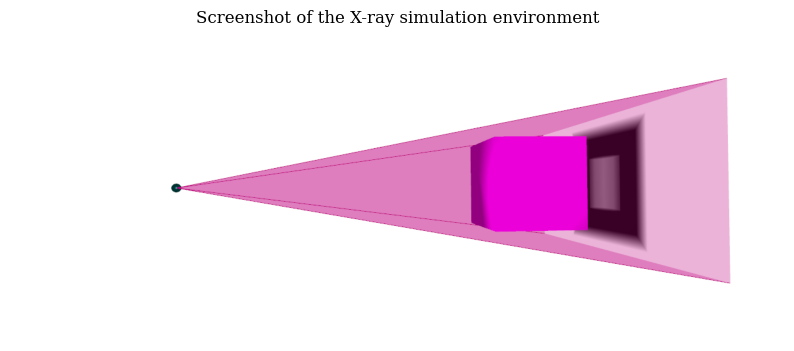

In [10]:
plotScreenshot()

In [11]:
lbuffer = np.array(gvxr.getLastLBuffer())

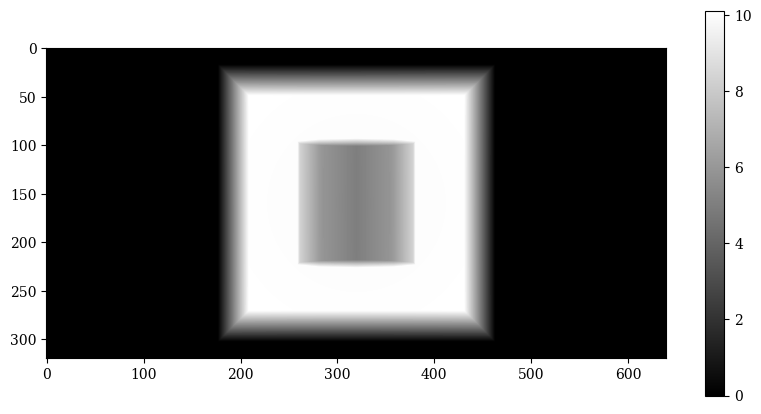

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(lbuffer, cmap="gray")
plt.colorbar()
plt.margins(0,0)
plt.savefig("lbuffer2.pdf")

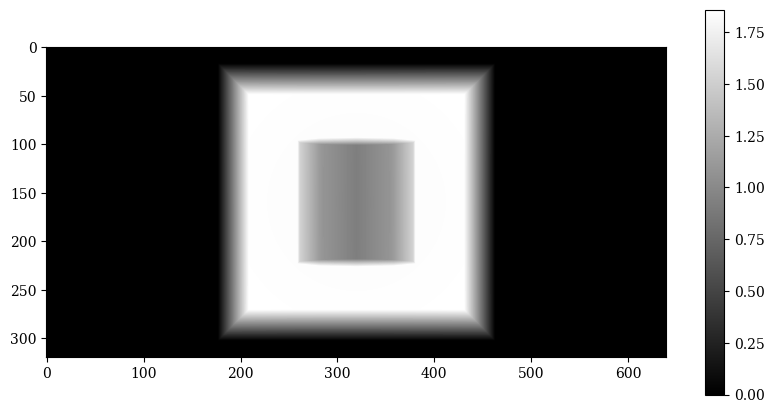

In [13]:
mu_d = lbuffer * gvxr.getLinearAttenuationCoefficient("cube", 80, "keV")

plt.figure(figsize=(10, 5))
plt.imshow(mu_d, cmap="gray")
plt.colorbar()
plt.margins(0,0)
plt.savefig("mu_x_times_d_x2.pdf")

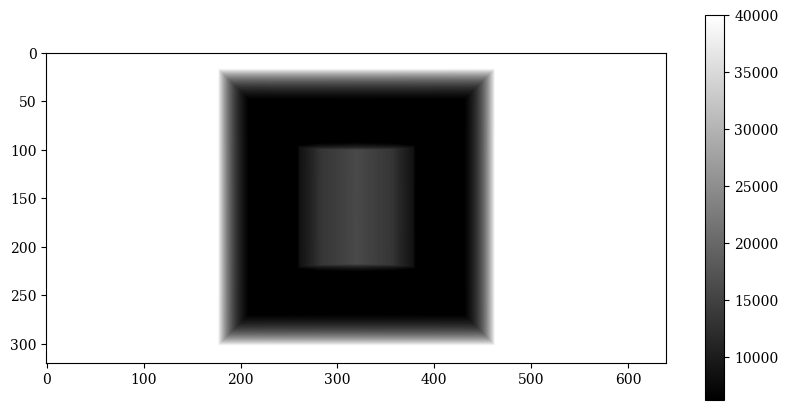

In [14]:
xray_image = np.array(gvxr.computeXRayImage(), dtype=np.single)
xray_image /= gvxr.getUnitOfEnergy("keV") # Conversion in MeV, not needed it's the default unit

plt.figure(figsize=(10, 5))
plt.imshow(xray_image, cmap="gray")
plt.colorbar()
plt.margins(0,0)
plt.savefig("integrated_energy2.pdf")

In [15]:
import subprocess

for fname in ["lbuffer2.pdf", "mu_x_times_d_x2.pdf", "integrated_energy2.pdf"]:
    subprocess.run(['pdfcrop', fname])

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `lbuffer2-crop.pdf'.
PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `mu_x_times_d_x2-crop.pdf'.
PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `integrated_energy2-crop.pdf'.


In [16]:
gvxr.terminate()

Fri Mar 31 15:04:51 2023 ---- Destroy all the windows
Fri Mar 31 15:04:51 2023 ---- Destroy window 0(0x563e308b3fc0)
